In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.externals.six import StringIO

import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  cross_val_score

from IPython.display import Image
from scipy.stats import randint

C:\Python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#carrega a base iris do próprio sckit-learn
iris = load_iris()

# carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)

As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


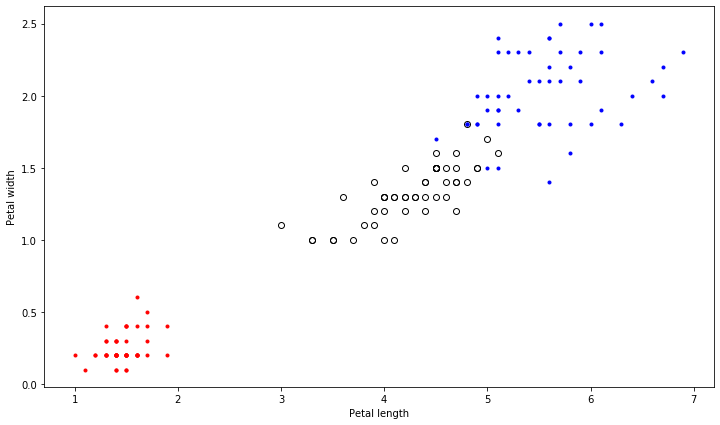

In [3]:
##########################
#Exercício 01
##########################

#plote o gráfico de dispersão. 
#Dica: analise o vetor de labels (y) e plote com cores 
#diferentes as características comprimento e largura da pétala 
#(armazenadas em X) de cada rótulo.
plt.figure(figsize=(12,7))
plt.plot(X[y==0][:,2], X[y==0][:,3], 'r.')
plt.plot(X[y==1][:,2], X[y==1][:,3], 'ko', markerfacecolor='none', markeredgecolor='k')
plt.plot(X[y==2][:,2], X[y==2][:,3], 'b.')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


#analise visualmente como seriam as fronteiras de decisão, 
#considerando apenas cortes ortogonais.


In [4]:
#separando em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

# imprime as dimensões das bases
print("Dimensões das bases de treinamento e teste:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensões das bases de treinamento e teste:
(120, 4)
(30, 4)
(120,)
(30,)


In [6]:
#classificação utilizando uma árvore de decisão não otimizada

#cria o classificador
clf = tree.DecisionTreeClassifier(criterion='gini') #testar com (criterion='entropy')

A acurácia permaneceu igual com os dois parâmetros (=0.9)

In [7]:

#treina o classificador com a base de treinamento
clf = clf.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf.predict(X_test)

##########################
#Exercício 02 - A
#mostrar a acurácia
##########################
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy %.4f\n"% acc)


Accuracy 0.9000



Para o teste, acertou 90% dos casos

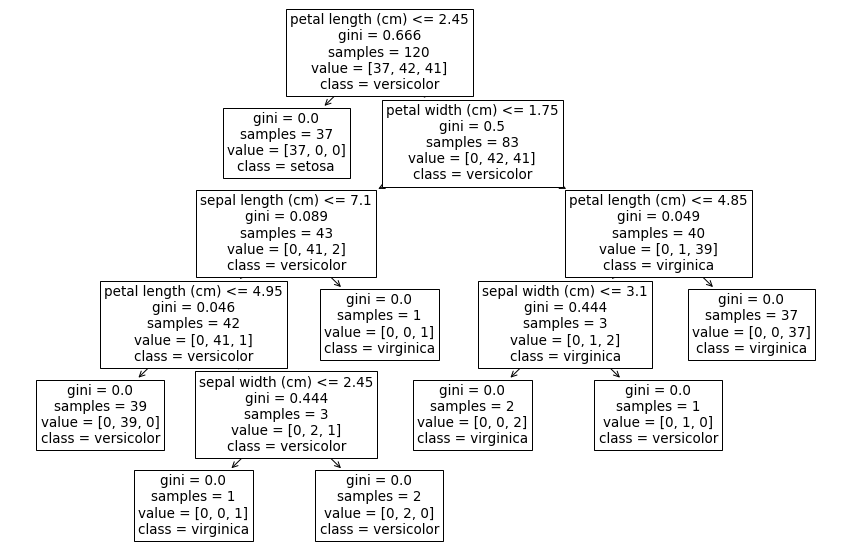

In [8]:

##########################
#Exercício 02 - B
##Analise a árvore de decisão criada
##########################
#cria uma imagem para mostrar a árvore de decisão criada
'''
out = StringIO()
tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT.png', 'wb') as f:
    f.write(graph.create_png())
Image("irisDT.png") 
'''

plt.figure(figsize=(15,10))
a = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)    

Sim, pode-se fazer melhorias diminuindo, por exemplo, a altura da árvore ("ignora" os ramos com poucos samples). Com isso, apesar de introduzir um pequeno erro, usaria menos características e menos decisões, mas manteria uma boa precisão

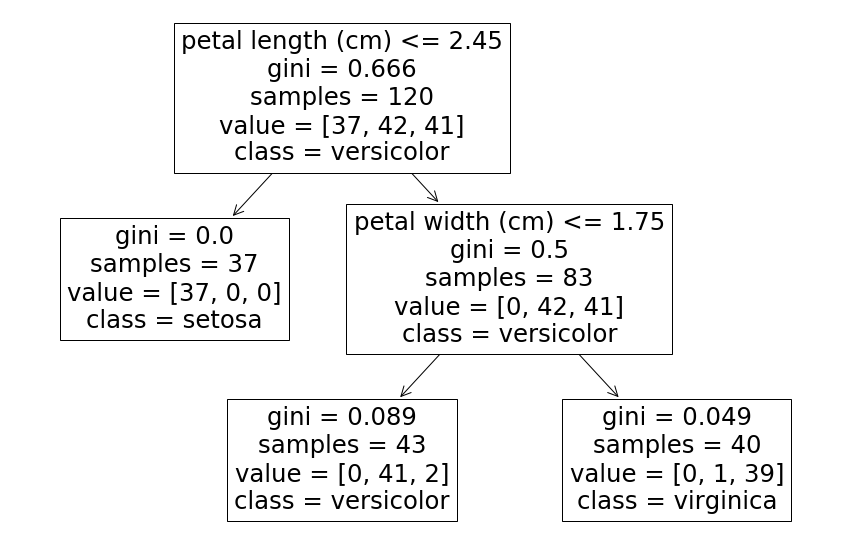

In [9]:
##########################
#Exercício 02 - C
##Crie um classificador (ie, uma árvore de decisão) com os parâmetros 
##definidos manualmente por você
mytree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2) 
                                #min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False

mytree = mytree.fit(X_train, y_train)

plt.figure(figsize=(15,10))
a = tree.plot_tree(mytree, feature_names=iris.feature_names, class_names=iris.target_names)
#procure informações na documentação.
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
##########################

In [10]:
#classificação utilizando uma árvore de decisão otimizada, onde os parâmetros são definidos pela função RandomizedSearchCV

clf_rs = DecisionTreeClassifier()

##########################
#Exercício 03 - A
#Analisar os parâmetros utilizados pela RandomizedSearchCV()
##########################
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": randint(1, 20),
                  "min_samples_leaf": randint(1, 20),
                  "max_leaf_nodes": randint(2, 20)}
   
# roda a randomized search     
clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

Não é igual ao __GridSearchCV__ pois não avalia todas as possibilidades. O número de possibilidades/tentativas é dado por __n_iter__. Os parâmetros utilizados na busca é dado por __param_distributions__.
 - criterion: função de critério.
 - min_samples_split: número mínimo de amostras para realizar um split.
 - max_depth: altura máxima da árvore.
 - min_samples_leaf: número mínimo de amostras para uma folha.
 - max_leaf_nodes: número máximo de folhas

In [11]:
##########################
#Exercício 03 - B
#Treinar e testar o classificador. Depois, mostrar as métricas de avaliação 
#(mesmos passos realizados para a árvore não otimizada)
##########################

#treina o classificador com a base de treinamento
clf_rs.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf_rs.predict(X_test)
        
#mostrar a acurácia
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)


Accuracy
 0.9


C:\Python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
clf_rs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 14,
 'min_samples_split': 14}

In [13]:
##########################
#Exercício 03 - C
#Analisar os parâmetros (e índices) testados na RandomizedSearchCV()
##########################
print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score']
stds = clf_rs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))


Parâmetros e índices do melhor estimador encontrado:
{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 14, 'min_samples_split': 14}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Índices para todos os testes realizados pela RandomizedSearchCV():
0.950 (+/-0.069) for {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 14, 'min_samples_split': 14}
0.950 (+/-0.069) for {'criterion': 'gini', 'max_depth': 17, 'max_leaf_nodes': 16, 'min_samples_leaf': 19, 'min_samples_split': 12}
0.950 (+/-0.069) for {'criterion': 'gini', 'max_depth': 16, 'max_leaf_nodes': 12, 'min_samples_le

In [ ]:
##########################
#Exercício 03 - D
##Compare a árvore de decisão com a anterior (não-otimizada)
##########################

out = StringIO()
tree.export_graphviz(clf_rs.best_estimator_, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
with open('irisDT-RS.png', 'wb') as f:
    f.write(graph.create_png())    
Image("irisDT-RS.png") 

'''
plt.figure(figsize=(15,10))
a = tree.plot_tree(clf_rs, feature_names=iris.feature_names, class_names=iris.target_names)
'''

A segunda árvore possui uma altura menor, folhas com mais amostras e obteve uma melhor acurácia no dados de testes. Outro fato é que a segunda árvore não utiliza o dado _sepal width_. Algumas podas podiam ser feitas na segunda árvore (certas ramificações levam na mesma classe).

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [74]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
n = 5
kas = list()
acuracias = list()
melhorAcuracia = 0
melhorK = 0
kasfold = list()
acuraciasfold = list()
melhorAcuraciafold = 0
melhorKfold = 0

In [75]:
%%time
for k in range(1,81):
    accacc = 0
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        preditor = classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, preditor)
        #print("Accuracy %.4f"% acc)
        accacc = accacc + acc #acumulador de acuracias
    kas.append(k)
    acuracias.append(accacc/n)
    if ((accacc/n) > melhorAcuracia):
        melhorAcuracia = accacc/n
        melhorK = k
        
    print("Average Accuracy %.4f with k = %d"% (accacc/n, k))
print("Best K: %d"%melhorK)

Average Accuracy 0.9533 with k = 1
Average Accuracy 0.9333 with k = 2
Average Accuracy 0.9667 with k = 3
Average Accuracy 0.9667 with k = 4
Average Accuracy 0.9700 with k = 5
Average Accuracy 0.9667 with k = 6
Average Accuracy 0.9567 with k = 7
Average Accuracy 0.9633 with k = 8
Average Accuracy 0.9333 with k = 9
Average Accuracy 0.9633 with k = 10
Average Accuracy 0.9667 with k = 11
Average Accuracy 0.9600 with k = 12
Average Accuracy 0.9600 with k = 13
Average Accuracy 0.9733 with k = 14
Average Accuracy 0.9600 with k = 15
Average Accuracy 0.9467 with k = 16
Average Accuracy 0.9433 with k = 17
Average Accuracy 0.9633 with k = 18
Average Accuracy 0.9467 with k = 19
Average Accuracy 0.9400 with k = 20
Average Accuracy 0.9167 with k = 21
Average Accuracy 0.9433 with k = 22
Average Accuracy 0.9500 with k = 23
Average Accuracy 0.9400 with k = 24
Average Accuracy 0.9333 with k = 25
Average Accuracy 0.9333 with k = 26
Average Accuracy 0.9200 with k = 27
Average Accuracy 0.9200 with k = 28
A

Percebe-se que, inicialmente, não há uma diferença tão significativa, mas a acurácia vai piorando conforme k aumenta muito

In [76]:
%%time
n = 5
kf = KFold(n_splits = n)
for k in range(1,81):
    accacc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        preditor = classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, preditor)
        #print("Accuracy %.4f"% acc)
        accacc = accacc + acc
    kasfold.append(k)
    acuraciasfold.append(accacc/n)
    if ((accacc/n) > melhorAcuraciafold):
        melhorAcuraciafold = accacc/n
        melhorKfold = k
    print("Average Accuracy %.4f with k = %d"% (accacc/n, k))
print("Best K: %d"%melhorKfold)

Average Accuracy 0.9267 with k = 1
Average Accuracy 0.9067 with k = 2
Average Accuracy 0.9067 with k = 3
Average Accuracy 0.9067 with k = 4
Average Accuracy 0.9133 with k = 5
Average Accuracy 0.9067 with k = 6
Average Accuracy 0.9200 with k = 7
Average Accuracy 0.9133 with k = 8
Average Accuracy 0.9200 with k = 9
Average Accuracy 0.9200 with k = 10
Average Accuracy 0.9133 with k = 11
Average Accuracy 0.8933 with k = 12
Average Accuracy 0.9067 with k = 13
Average Accuracy 0.9000 with k = 14
Average Accuracy 0.9000 with k = 15
Average Accuracy 0.8867 with k = 16
Average Accuracy 0.8800 with k = 17
Average Accuracy 0.8667 with k = 18
Average Accuracy 0.8867 with k = 19
Average Accuracy 0.8667 with k = 20
Average Accuracy 0.8667 with k = 21
Average Accuracy 0.8667 with k = 22
Average Accuracy 0.8667 with k = 23
Average Accuracy 0.8467 with k = 24
Average Accuracy 0.8600 with k = 25
Average Accuracy 0.8467 with k = 26
Average Accuracy 0.8467 with k = 27
Average Accuracy 0.8200 with k = 28
A

Usando k-fold, o valor de K ficou em 1 em todas as execuções

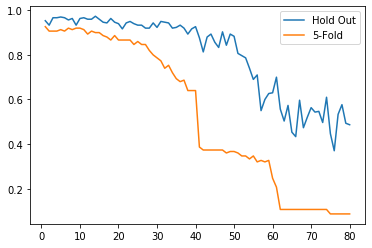

In [77]:
plt.plot(kas, acuracias, label = 'Hold Out')
plt.plot(kasfold,acuraciasfold, label = '5-Fold')
plt.legend()
plt.show()

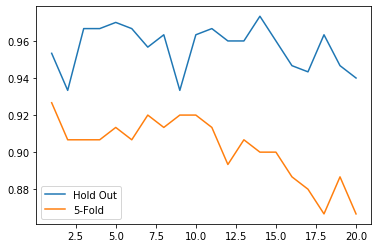

In [78]:
#Só as primeiras
plt.plot(kas[:20], acuracias[:20], label = 'Hold Out')
plt.plot(kasfold[:20],acuraciasfold[:20], label = '5-Fold')
plt.legend()
plt.show()

Aplicando para o melhor K encontrado:

In [79]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
classifier = KNeighborsClassifier(n_neighbors = melhorK)
classifier.fit(X_train, y_train)
preditor = classifier.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, preditor)
confusionMatrix = sklearn.metrics.confusion_matrix(y_test, preditor)
#Average = This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. 
#          Otherwise, this determines the type of averaging performed on the data
#          Pode ser 'micro', 'macro', 'weighted', 'samples' ou None
precision = sklearn.metrics.precision_score(y_test, preditor, average=None)
recall = sklearn.metrics.recall_score(y_test, preditor, average=None)
print("Acc: %.4f"%acc)
print(iris.target_names)
print(precision)
print(recall)
print(confusionMatrix)

Acc: 0.9167
['setosa' 'versicolor' 'virginica']
[1.         0.85714286 0.9       ]
[1.         0.9        0.85714286]
[[19  0  0]
 [ 0 18  2]
 [ 0  3 18]]


Usando árvore de decisão criada anteriormente:

In [83]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
mytree = DecisionTreeClassifier(criterion='gini', splitter='best') 
                                #min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False

mytree = mytree.fit(X_train, y_train)

#testa o classificador com a base de testes
preditorTree = mytree.predict(X_test)

accTree = sklearn.metrics.accuracy_score(y_test, preditorTree)
confusionMatrixTree = sklearn.metrics.confusion_matrix(y_test, preditorTree)
precisionTree = sklearn.metrics.precision_score(y_test, preditorTree, average=None)
recallTree = sklearn.metrics.recall_score(y_test, preditorTree, average=None)
print("Acc: %.4f"%accTree)
print(iris.target_names)
print(precisionTree)
print(recallTree)
print(confusionMatrixTree)


Acc: 0.9333
['setosa' 'versicolor' 'virginica']
[1.         0.83333333 0.94117647]
[1.         0.9375     0.84210526]
[[25  0  0]
 [ 0 15  1]
 [ 0  3 16]]


-------------------------------------------------------------------------------------------------------------------------------

Usando a base de dados MNIST (https://www.kaggle.com/c/digit-recognizer/) + K-Fold

In [ ]:
%%time
n = 5
kf = KFold(n_splits = n)
for k in range(1,81):
    accacc = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(X_train, y_train)
        preditor = classifier.predict(X_test)

        acc = sklearn.metrics.accuracy_score(y_test, preditor)
        #print("Accuracy %.4f"% acc)
        accacc = accacc + acc
    kasfold.append(k)
    acuraciasfold.append(accacc/n)
    if ((accacc/n) > melhorAcuraciafold):
        melhorAcuraciafold = accacc/n
        melhorKfold = k
    print("Average Accuracy %.4f with k = %d"% (accacc/n, k))
print("Best K: %d"%melhorKfold)